In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [2]:
#글씨설정
plt.rc("font",family="Malgun Gothic")
sns.set(font="Margun Gothic",rc={"axes.unicode_minus":False},style='darkgrid')
mpl.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#맷플롯립 한글 설정
font_path = r'C:\Users\dudtj\OneDrive\Desktop\금융데이터\NanumFontSetup_TTF_ALL'
fontprop = fm.FontProperties(fname=font_path, size=18)

In [3]:
data = pd.read_csv(r'C:\Users\dudtj\OneDrive\Desktop\python\금융데이터\금융보안원_경진대회_데이터(최종제출)1.csv',encoding='euc-kr')

In [4]:
#매출금액 단위 만원으로 변환 
data['매출금액'] = data['매출금액']/10000
data.rename(columns={'매출금액' : '매출금액(단위:만원)'}, inplace=True)

In [5]:
data.loc[(data.품목대분류명=='인테리어'),'품목대분류명']='기타'
data.loc[(data.품목대분류명=='가구'),'품목대분류명']='기타'
data.loc[(data.품목대분류코드=='13'),'품목대분류코드']='99'
data.loc[(data.품목대분류코드=='14'),'품목대분류코드']='99'

In [6]:
grouped = data['매출금액(단위:만원)'].groupby(data['품목대분류명']).sum()
df_g = pd.DataFrame(grouped)
df_g=df_g.sort_values(by=['매출금액(단위:만원)'])

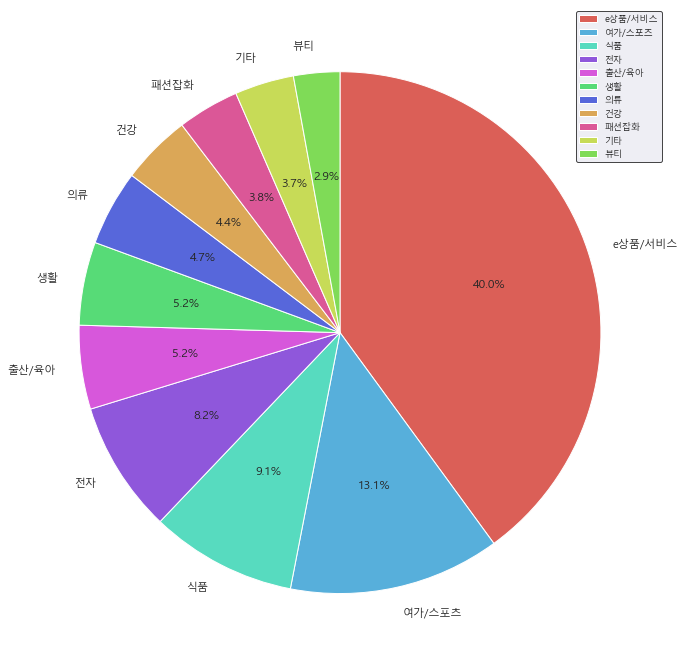

In [7]:
import matplotlib.pyplot as plt
import numpy as np

## 데이터 준비
labels = data['매출금액(단위:만원)'].groupby(data['품목대분류명']).sum().index## 라벨
colors = sns.color_palette('hls',len(labels)) ## 색상
frequency =data['매출금액(단위:만원)'].groupby(data['품목대분류명']).sum() ## 빈도
 
## 데이터 라벨, 빈도수, 색상을 빈도수를 기준으로 정렬해야한다.
labels_frequency = zip(labels,frequency,colors) 
labels_frequency = sorted(labels_frequency,key=lambda x: x[1],reverse=True)
 
sorted_labels = [x[0] for x in labels_frequency] ## 정렬된 라벨
sorted_frequency = [x[1] for x in labels_frequency] ## 정렬된 빈도수
sorted_colors = [x[2] for x in labels_frequency] ## 정렬된 색상
 
fig = plt.figure(figsize=(12,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성

pie = ax.pie(sorted_frequency, ## 파이차트 출력
       labels=sorted_labels,
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계방향으로 그려짐
       colors = sorted_colors,
       autopct= '%1.1f%%' ## 색상 지정
       )

plt.legend(pie[0],sorted_labels,loc='upper right',fontsize=9,edgecolor='k') ## 범례
plt.show()

####인테리어 가구 기타

스케일링 한 뒤 다시 저장

식품

In [8]:
data_f = data[data['품목대분류명'] == '식품']
grouped_C = pd.DataFrame(data_f['매출건수'].groupby(data_f['기준년월']).sum())
grouped_M = pd.DataFrame(data_f['매출금액(단위:만원)'].groupby(data_f['기준년월']).sum())
df_f = pd.merge(grouped_M, grouped_C, on = '기준년월')
df_f.reset_index(inplace=True)
df_f["기준년월"]=["19_03","19_09","20_03","20_09","21_03"]
df_f

,기준년월,매출금액(단위:만원),매출건수
0,19_03,1.624850e+06,475335
1,19_09,1.376297e+06,379678
2,20_03,2.100142e+06,613956
3,20_09,2.907012e+06,749066
4,21_03,2.290934e+06,686292


In [9]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 객체생성
scaler = StandardScaler()

# fit -> transform
scaler.fit(df_f) # df_f는 2차원 이상의 값이어야 함
df_f_scaled = scaler.transform(df_f)

# 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
df_f_scaled = pd.DataFrame(data = df_f_scaled)


# *** 만약 특정 열의 스케일링을 하고 싶은 경우 ***
A_n = scaler.fit_transform(df_f['매출금액(단위:만원)'].values.reshape(-1,1))
df_f.insert(0, '식품_매출금액(단위:만원)_scaled', A_n)
df_f.drop(['매출금액(단위:만원)'], axis=1, inplace=True)
B_n = scaler.fit_transform(df_f['매출건수'].values.reshape(-1,1))
df_f.insert(0, '식품_매출건수_scaled', B_n)
df_f.drop(['매출건수'], axis=1, inplace=True)

여가/스포츠

In [10]:
data_s = data[data['품목대분류명'] == '여가/스포츠']
grouped_C = pd.DataFrame(data_s['매출건수'].groupby(data_s['기준년월']).sum())
grouped_M = pd.DataFrame(data_s['매출금액(단위:만원)'].groupby(data_s['기준년월']).sum())
df_s = pd.merge(grouped_M, grouped_C, on = '기준년월')
df_s.reset_index(inplace=True)
df_s["기준년월"]=["19_03","19_09","20_03","20_09","21_03"]
df_s

,기준년월,매출금액(단위:만원),매출건수
0,19_03,3.146563e+06,490284
1,19_09,3.337995e+06,485056
2,20_03,2.314616e+06,413706
3,20_09,2.737054e+06,471876
4,21_03,3.333242e+06,528049


In [11]:
# 객체생성
scaler = StandardScaler()

# fit -> transform
scaler.fit(df_s) # df_s는 2차원 이상의 값이어야 함
df_s_scaled = scaler.transform(df_s)

# 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
df_s_scaled = pd.DataFrame(data = df_s_scaled)


# *** 만약 특정 열의 스케일링을 하고 싶은 경우 ***
A_n = scaler.fit_transform(df_s['매출금액(단위:만원)'].values.reshape(-1,1))
df_s.insert(0, '여가/스포츠_매출금액(단위:만원)_scaled', A_n)
df_s.drop(['매출금액(단위:만원)'], axis=1, inplace=True)
B_n = scaler.fit_transform(df_s['매출건수'].values.reshape(-1,1))
df_s.insert(0, '여가/스포츠_매출건수_scaled', B_n)
df_s.drop(['매출건수'], axis=1, inplace=True)


전자

In [12]:
data_j = data[data['품목대분류명'] == '전자']
grouped_C = pd.DataFrame(data_j['매출건수'].groupby(data_j['기준년월']).sum())
grouped_M = pd.DataFrame(data_j['매출금액(단위:만원)'].groupby(data_j['기준년월']).sum())
df_j = pd.merge(grouped_M, grouped_C, on = '기준년월')
df_j.reset_index(inplace=True)
df_j["기준년월"]=["19_03","19_09","20_03","20_09","21_03"]
df_j

,기준년월,매출금액(단위:만원),매출건수
0,19_03,1.759479e+06,190838
1,19_09,1.486418e+06,175082
2,20_03,1.946585e+06,208306
3,20_09,1.992711e+06,179644
4,21_03,2.084544e+06,206078


In [13]:
# 객체생성
scaler = StandardScaler()

# fit -> transform
scaler.fit(df_j) # df_j는 2차원 이상의 값이어야 함
df_j_scaled = scaler.transform(df_j)

# 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
df_j_scaled = pd.DataFrame(data = df_j_scaled)


# *** 만약 특정 열의 스케일링을 하고 싶은 경우 ***
A_n = scaler.fit_transform(df_j['매출금액(단위:만원)'].values.reshape(-1,1))
df_j.insert(0, '전자_매출금액(단위:만원)_scaled', A_n)
df_j.drop(['매출금액(단위:만원)'], axis=1, inplace=True)
B_n = scaler.fit_transform(df_j['매출건수'].values.reshape(-1,1))
df_j.insert(0, '전자_매출건수_scaled', B_n)
df_j.drop(['매출건수'], axis=1, inplace=True)


e상품/서비스

In [14]:
data_e = data[data['품목대분류명'] == 'e상품/서비스']
grouped_C = pd.DataFrame(data_e['매출건수'].groupby(data_e['기준년월']).sum())
grouped_M = pd.DataFrame(data_e['매출금액(단위:만원)'].groupby(data_e['기준년월']).sum())
df_e = pd.merge(grouped_M, grouped_C, on = '기준년월')
df_e.reset_index(inplace=True)
df_e["기준년월"]=["19_03","19_09","20_03","20_09","21_03"]
df_e

,기준년월,매출금액(단위:만원),매출건수
0,19_03,7.020302e+06,1884001
1,19_09,7.255877e+06,1876005
2,20_03,9.464159e+06,2610928
3,20_09,1.003509e+07,2598550
4,21_03,1.164213e+07,3139815


In [15]:
# 객체생성
scaler = StandardScaler()

# fit -> transform
scaler.fit(df_e) # df_e는 2차원 이상의 값이어야 함
df_e_scaled = scaler.transform(df_e)

# 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
df_e_scaled = pd.DataFrame(data = df_e_scaled)


# *** 만약 특정 열의 스케일링을 하고 싶은 경우 ***
A_n = scaler.fit_transform(df_e['매출금액(단위:만원)'].values.reshape(-1,1))
df_e.insert(0, 'e상품/서비스_매출금액(단위:만원)_scaled', A_n)
df_e.drop(['매출금액(단위:만원)'], axis=1, inplace=True)
B_n = scaler.fit_transform(df_e['매출건수'].values.reshape(-1,1))
df_e.insert(0, 'e상품/서비스_매출건수_scaled', B_n)
df_e.drop(['매출건수'], axis=1, inplace=True)
df_e


,e상품/서비스_매출건수_scaled,e상품/서비스_매출금액(단위:만원)_scaled,기준년월
0,-1.112040,-1.183566,19_03
1,-1.128572,-1.048427,19_09
2,0.390905,0.218361,20_03
3,0.365313,0.545875,20_09
4,1.484396,1.467757,21_03


<function matplotlib.pyplot.show(close=None, block=None)>

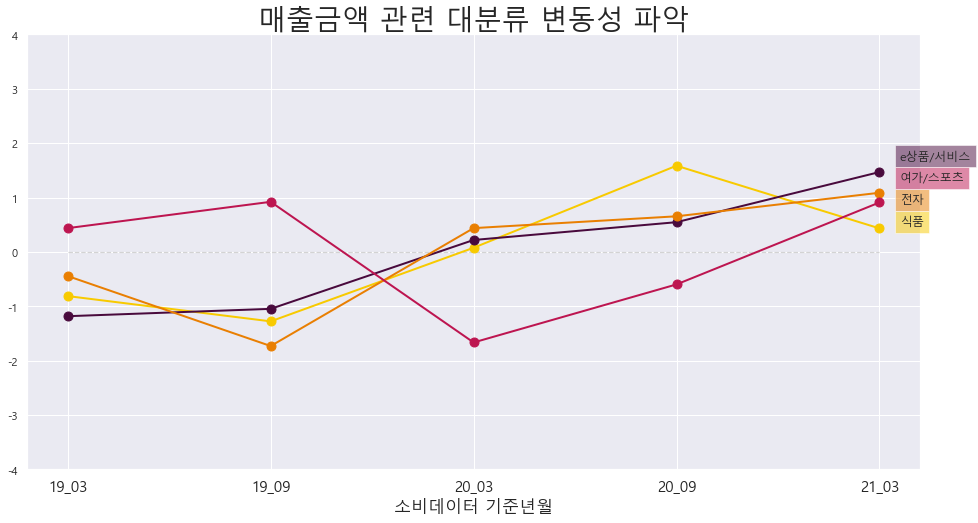

In [68]:
fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot()
ax.plot(df_f['기준년월'],df_f['식품_매출금액(단위:만원)_scaled'],'-o',color='#f8ca00',markersize=9,linewidth=2,label='식품')
ax.plot(df_f['기준년월'],df_e['e상품/서비스_매출금액(단위:만원)_scaled'],'-o',color='#490a3d',markersize=9,linewidth=2,label='e상품/서비스')
ax.plot(df_f['기준년월'],df_j['전자_매출금액(단위:만원)_scaled'],'-o',markersize=9,color='#e97f02',linewidth=2,label='전자')
ax.plot(df_f['기준년월'],df_s['여가/스포츠_매출금액(단위:만원)_scaled'],'-o',markersize=9,color='#bd1550',linewidth=2,label='여가/스포츠')

plt.title('매출금액 관련 대분류 변동성 파악', fontsize = 28)

plt.xticks(fontsize = 15)
plt.xlabel('소비데이터 기준년월', fontsize = 17)
plt.hlines(0, 0, 4,color='lightgray', linestyle='--', linewidth=1.2)
plt.ylim(-4,4)
ax.grid(True)

ax.text(4.1, 0.5, '식품', style='italic',
        bbox={'facecolor': '#f8ca00', 'alpha': 0.5, 'pad': 5})
ax.text(4.1, 1.7, 'e상품/서비스', style='italic',
        bbox={'facecolor': '#490a3d', 'alpha': 0.5, 'pad': 5})
ax.text(4.1, 0.9, '전자', style='italic',
        bbox={'facecolor': '#e97f02', 'alpha': 0.5, 'pad': 5})
ax.text(4.1, 1.3, '여가/스포츠', style='italic',
        bbox={'facecolor': '#bd1550', 'alpha': 0.5, 'pad': 5})
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

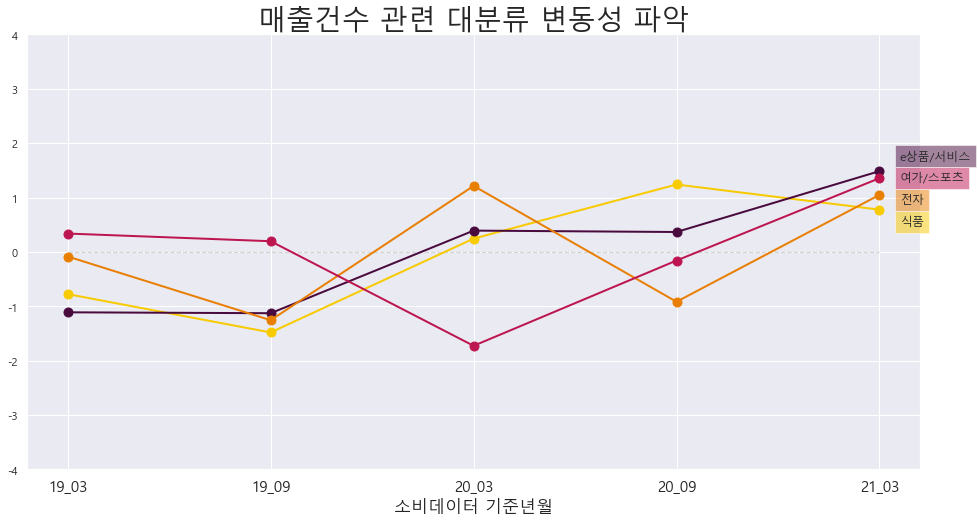

In [66]:
fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot()
ax.plot(df_f['기준년월'],df_f['식품_매출건수_scaled'],'-o',color='#f8ca00',markersize=9,linewidth=2,label='식품')
ax.plot(df_f['기준년월'],df_e['e상품/서비스_매출건수_scaled'],'-o',color='#490a3d',markersize=9,linewidth=2,label='e상품/서비스')
ax.plot(df_f['기준년월'],df_j['전자_매출건수_scaled'],'-o',markersize=9,color='#e97f02',linewidth=2,label='전자')
ax.plot(df_f['기준년월'],df_s['여가/스포츠_매출건수_scaled'],'-o',markersize=9,color='#bd1550',linewidth=2,label='여가/스포츠')

plt.title('매출건수 관련 대분류 변동성 파악', fontsize = 28)

plt.xticks(fontsize = 15)
plt.xlabel('소비데이터 기준년월', fontsize = 17)
plt.hlines(0, 0, 4,color='lightgray', linestyle='--', linewidth=1.2)
plt.ylim(-4,4)
ax.grid(True)

ax.text(4.1, 0.5, '식품', style='italic',
        bbox={'facecolor': '#f8ca00', 'alpha': 0.5, 'pad': 5})
ax.text(4.1, 1.7, 'e상품/서비스', style='italic',
        bbox={'facecolor': '#490a3d', 'alpha': 0.5, 'pad': 5})
ax.text(4.1, 0.9, '전자', style='italic',
        bbox={'facecolor': '#e97f02', 'alpha': 0.5, 'pad': 5})
ax.text(4.1, 1.3, '여가/스포츠', style='italic',
        bbox={'facecolor': '#bd1550', 'alpha': 0.5, 'pad': 5})
plt.show

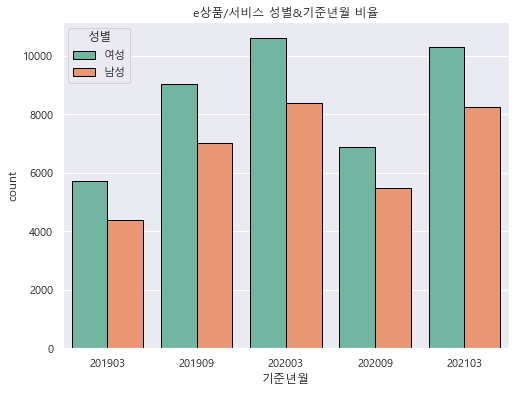

In [18]:
#성별
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
sns.countplot(x = '기준년월', data = data_e, edgecolor= 'black', palette='Set2', hue = '성별')
ax.set_title('e상품/서비스 성별&기준년월 비율')
plt.show()

In [19]:
data_e

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액(단위:만원),매출건수
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,96.3789,29
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,108.9360,54
16,201903,21,e상품/서비스,2112,모바일상품,여성,40대,초중고자녀가구,서울특별시,강동구,길동,100.6313,54
23,201903,21,e상품/서비스,2110,o2o서비스,남성,30대,1인가구,서울특별시,강동구,길동,153.1532,75
24,201903,21,e상품/서비스,2112,모바일상품,여성,30대,신혼영유아가구,서울특별시,강동구,길동,156.2958,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519280,202103,21,e상품/서비스,2110,o2o서비스,여성,40대,초중고자녀가구,서울특별시,중구,태평로2가,55.3418,12
519281,202103,21,e상품/서비스,2110,o2o서비스,남성,50대,성인자녀가구,서울특별시,용산구,한강로1가,72.0728,17
519287,202103,21,e상품/서비스,2110,o2o서비스,여성,60대 이상,노인가구,서울특별시,성북구,동소문동7가,38.5208,7
519293,202103,21,e상품/서비스,2110,o2o서비스,남성,30대,1인가구,서울특별시,영등포구,영등포동7가,138.6040,63


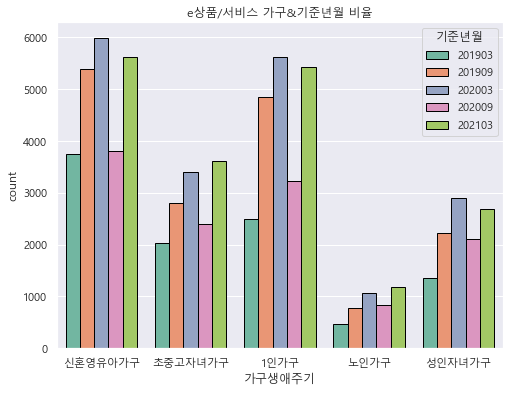

In [20]:
#가구생애주기
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
sns.countplot(x = '가구생애주기', data = data_e, edgecolor= 'black', palette='Set2', hue = '기준년월')
ax.set_title('e상품/서비스 가구&기준년월 비율')
plt.show()

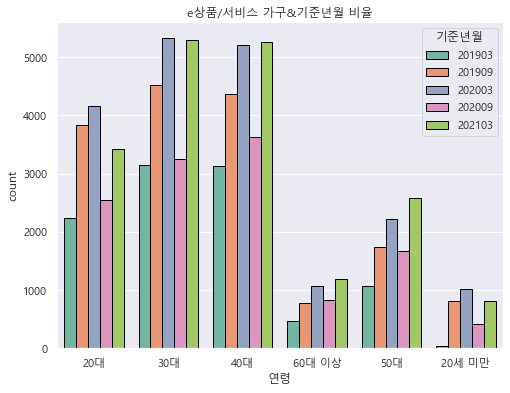

In [21]:
#연령
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
sns.countplot(x = '연령', data = data_e, edgecolor= 'black', palette='Set2', hue = '기준년월')
ax.set_title('e상품/서비스 가구&기준년월 비율')
plt.show()